In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [24]:
# load data 
df  = pd.read_csv("data/customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [25]:
# check if there are any missing values, duplicate values or null values
print(df.info())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [26]:
print(df.duplicated().sum())


0


In [27]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [28]:
# since there are 24null values in income. so delete those rows
df = df.dropna()
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [29]:
# i don't see any use of that dt_customer column. so drop it
df_copy = df.drop(columns=['Dt_Customer'])
df_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [30]:
# let's change the birth_year to age 
from datetime import datetime
current_year = datetime.now().year
if 'Age' not in df_copy.columns:
    df_copy['Age'] = current_year - df_copy['Year_Birth']
    df_copy.drop(columns=['Year_Birth'], inplace=True)
df_copy.head()



,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,3,11,1,69
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,3,11,0,72
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,3,11,0,61
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,3,11,0,42
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,3,11,0,45


In [31]:
# lets encode the categorical columns. use use label encoding for simplicity
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    df_copy[col] = le.fit_transform(df_copy[col])

In [32]:
# let's group distinct groups based on their spending habits 
# (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds)

X = df_copy[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [33]:
# lets use standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [34]:


# lets perform elbow method to find optimal number of clusters
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

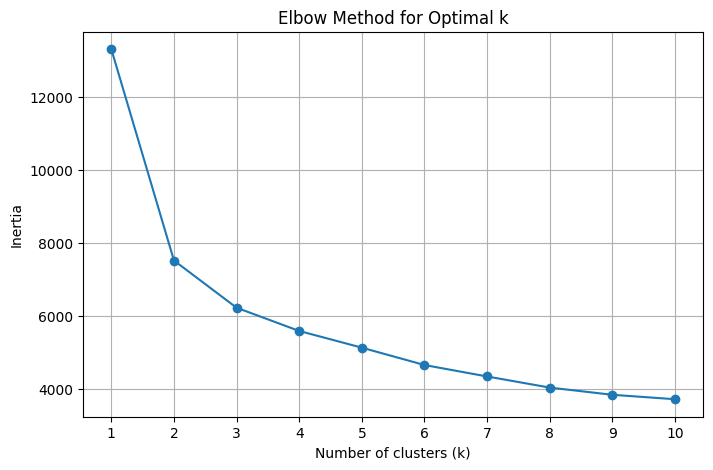

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [36]:
# from the elbow plot, it looks like optimal k is 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_


In [37]:
df_copy["spending_cluster"] = labels
df_copy.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,spending_cluster
0,5524,2,4,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,69,3
1,2174,2,4,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,72,0
2,4141,2,5,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,61,2
3,6182,2,5,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,42,0
4,5324,4,3,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,45,0


In [38]:
#let's calculate sillhouette score to evaluate the clustering
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

print(silhouette_coefficients)


[0.5132795998426936, 0.4605461093986014, 0.4455489206420886, 0.47424782932439324, 0.4501956061052624, 0.45656126190260854, 0.45736820273496703, 0.4021075833862466, 0.42334562071998705]


In [39]:
# now categorize the customers based on (NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth), 
X2 = df_copy[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
X2_scaled = scaler.fit_transform(X2)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X2_scaled)
labels2 = kmeans.labels_
df_copy["purchase_cluster"] = labels2
df_copy.head()


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,spending_cluster,purchase_cluster
0,5524,2,4,58138.0,0,0,58,635,88,546,...,0,0,0,0,3,11,1,69,3,1
1,2174,2,4,46344.0,1,1,38,11,1,6,...,0,0,0,0,3,11,0,72,0,0
2,4141,2,5,71613.0,0,0,26,426,49,127,...,0,0,0,0,3,11,0,61,2,1
3,6182,2,5,26646.0,1,0,26,11,4,20,...,0,0,0,0,3,11,0,42,0,0
4,5324,4,3,58293.0,1,0,94,173,43,118,...,0,0,0,0,3,11,0,45,0,3


In [40]:
# now categorize the customers based on their demographics (Income, Kidhome, Teenhome).
X3 = df_copy[['Income', 'Kidhome', 'Teenhome']]
X3_scaled = scaler.fit_transform(X3)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X3_scaled)
labels3 = kmeans.labels_
df_copy["demographic_cluster"] = labels3
df_copy.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,spending_cluster,purchase_cluster,demographic_cluster
0,5524,2,4,58138.0,0,0,58,635,88,546,...,0,0,0,3,11,1,69,3,1,3
1,2174,2,4,46344.0,1,1,38,11,1,6,...,0,0,0,3,11,0,72,0,0,2
2,4141,2,5,71613.0,0,0,26,426,49,127,...,0,0,0,3,11,0,61,2,1,3
3,6182,2,5,26646.0,1,0,26,11,4,20,...,0,0,0,3,11,0,42,0,0,0
4,5324,4,3,58293.0,1,0,94,173,43,118,...,0,0,0,3,11,0,45,0,3,0


In [41]:
spending_cols = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

df_copy.groupby("spending_cluster")[spending_cols].mean()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
spending_cluster,,,,,,
0,92.060127,6.539557,35.368671,8.896361,6.447785,16.401899
1,588.534743,21.580060,155.108761,28.380665,19.655589,101.111782
2,633.955263,44.076316,451.552632,78.360526,55.115789,48.371053
3,514.568465,108.908714,425.004149,136.883817,100.813278,103.095436


In [42]:
purchase_cols = [
    "NumDealsPurchases", "NumWebPurchases","NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
df_copy.groupby("purchase_cluster")[purchase_cols].mean()




,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
purchase_cluster,,,,,
0,1.865792,2.012109,0.544904,3.189707,6.414733
1,2.386417,7.482436,3.725995,8.419204,5.576112
2,1.231618,4.316176,5.770221,8.360294,2.275735
3,6.342520,5.968504,2.555118,6.106299,7.129921


In [43]:
demographic_cols = ["Income", "Kidhome", "Teenhome"]
df_copy.groupby("demographic_cluster")[demographic_cols].mean()

,Income,Kidhome,Teenhome
demographic_cluster,,,
0,31085.009967,0.868771,0.000000
1,57803.839753,0.000000,1.046225
2,44090.088517,1.069378,1.050239
3,75178.032907,0.016453,0.003656
